# Part 3

## Generate the partial dependency plots for the top 5 features in your best Random Forest model from the previous assignment. Use the population distribution (%) as the primary y-axis and the response rate (%) as the secondary y-axis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#### I used annual feature because it has better precision, training set AUC, and test set AUC on random forest algorithm.

In [2]:
annual_features_outputs = pd.read_excel('annual_features_outputs.xlsx')

In [3]:
X_ann = annual_features_outputs.drop(['response', 'Unnamed: 0', 'customer_id'], axis = 1)
y_ann = annual_features_outputs['response']

In [5]:
X_train_annual, X_test_annual, y_train_annual, y_test_annual = train_test_split(X_ann, y_ann, test_size=2/3, random_state=1148)

In [6]:
scaler = StandardScaler()
X_train_annual_scaled = scaler.fit_transform(X_train_annual)

In [7]:
# The best model below is created as a result of fine-tuning previously.
estimator     = RandomForestClassifier(random_state=1147, n_estimators = 200, max_depth = 6, class_weight = 'balanced')
rf_best_model = estimator.fit(X_train_annual_scaled, y_train_annual)

In [8]:
importances = rf_best_model.feature_importances_
importances

array([0.00944195, 0.01429668, 0.02764468, 0.03351661, 0.01359439,
       0.01075468, 0.01470861, 0.02677851, 0.04079541, 0.01234255,
       0.01088713, 0.01679151, 0.02598346, 0.02934851, 0.01557092,
       0.00928796, 0.01598971, 0.01727592, 0.03107654, 0.00324984,
       0.00787515, 0.01425055, 0.01794422, 0.02227436, 0.00280438,
       0.01357859, 0.01214238, 0.07893624, 0.11215667, 0.01152994,
       0.00880907, 0.01323405, 0.01499966, 0.02740135, 0.00442312,
       0.00497251, 0.00593609, 0.03292168, 0.08448277, 0.01051444,
       0.00154629, 0.00207994, 0.00195328, 0.0020376 , 0.00211573,
       0.00106552, 0.00149952, 0.00110264, 0.00268547, 0.00259921,
       0.00258016, 0.00351694, 0.00452205, 0.00239686, 0.00248852,
       0.00574202, 0.00367942, 0.00421682, 0.00708552, 0.00258662,
       0.00298885, 0.00396031, 0.00572111, 0.00410596, 0.01714795,
       0.00583507, 0.00412956, 0.00757381, 0.00071445, 0.00278122,
       0.00058484, 0.00080114, 0.00349902, 0.00055851, 0.00157

In [9]:
# Get top 5 features' indices.
np.argsort(importances)[-5:]

array([ 3,  8, 27, 38, 28])

In [10]:
# Get top 5 features' names.
feature1 = X_train_annual.iloc[:, 1:].columns[3]
feature2 = X_train_annual.iloc[:, 1:].columns[8]
feature3 = X_train_annual.iloc[:, 1:].columns[27]
feature4 = X_train_annual.iloc[:, 1:].columns[38]
feature5 = X_train_annual.iloc[:, 1:].columns[28]

print('', feature1, '\n', feature2, '\n', feature3, '\n', feature4, '\n', feature5)

 ann_txn_amt_ave_2015 
 ann_txn_amt_max_2015 
 ann_txn_amt_sum_2014 
 ann_txn_cnt_2015 
 ann_txn_amt_sum_2015


## Feature 1

In [11]:
# Select the first feature along with the response to form a dataframe.
feature1_df = annual_features_outputs[[feature1, 'response']].sort_values(feature1, ascending = True)

# Explore the statistics of the dataframe.
feature1_df.describe()

,ann_txn_amt_ave_2015,response
count,6884.000000,6884.000000
mean,39.474486,0.093986
std,35.415586,0.291831
min,0.000000,0.000000
25%,0.000000,0.000000
50%,44.000000,0.000000
75%,70.500000,0.000000
max,105.000000,1.000000


Text(0.5, 1.0, 'Histogram of ann_txn_amt_ave_2015 distribution')

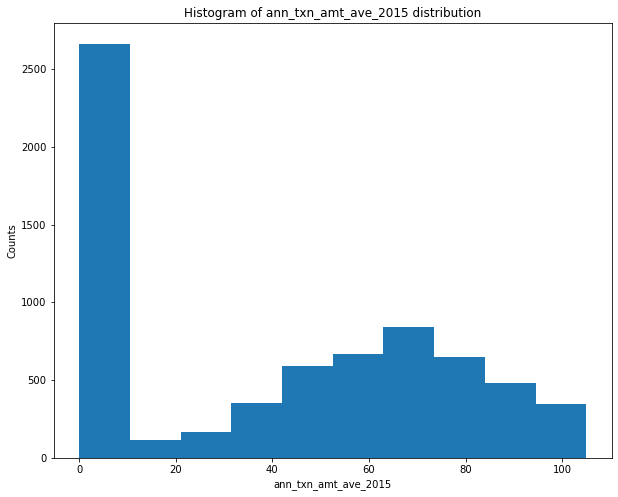

In [12]:
# Plot the histogram to see the distribution of this feature's values.
fig = plt.figure(figsize = (10, 8))
plt.hist(feature1_df.iloc[:, 0])
plt.xlabel(feature1)
plt.ylabel('Counts')
plt.title('Histogram of ' + feature1 + ' distribution')

### Explore the count of each range (personal choice).

In [13]:
feature1_df.loc[feature1_df[feature1] == 0].shape

(2659, 2)

In [14]:
feature1_df.loc[(feature1_df[feature1] > 0) & (feature1_df[feature1] <= 10)].shape

(3, 2)

In [15]:
feature1_df.loc[(feature1_df[feature1] > 10) & (feature1_df[feature1] <= 20)].shape

(116, 2)

In [16]:
feature1_df.loc[(feature1_df[feature1] > 20) & (feature1_df[feature1] <= 30)].shape

(151, 2)

In [17]:
feature1_df.loc[(feature1_df[feature1] > 30) & (feature1_df[feature1] <= 40)].shape

(318, 2)

In [18]:
feature1_df.loc[(feature1_df[feature1] > 40) & (feature1_df[feature1] <= 50)].shape

(537, 2)

In [19]:
feature1_df.loc[(feature1_df[feature1] > 50) & (feature1_df[feature1] <= 60)].shape

(624, 2)

In [20]:
feature1_df.loc[(feature1_df[feature1] > 60) & (feature1_df[feature1] <= 70)].shape

(739, 2)

In [21]:
feature1_df.loc[(feature1_df[feature1] > 70) & (feature1_df[feature1] <= 80)].shape

(733, 2)

In [22]:
feature1_df.loc[(feature1_df[feature1] > 80) & (feature1_df[feature1] <= 90)].shape

(490, 2)

In [23]:
feature1_df.loc[(feature1_df[feature1] > 90) & (feature1_df[feature1] <= 100)].shape

(371, 2)

In [24]:
feature1_df.loc[(feature1_df[feature1] > 100)].shape

(143, 2)

In [25]:
feature1_df.shape[0]

6884

#### Based on the shape of each range, I decided to use the following ranges:
#### {0, (0, 40], (40, 50], (50, 60], (60, 70], (70, 80], (80, 90], (90, $\infty$)}

In [26]:
feature1_population_distribution_0 = feature1_df.loc[feature1_df[feature1] == 0].shape[0]
feature1_population_distribution_40 = feature1_df.loc[(feature1_df[feature1] > 0) & (feature1_df[feature1] <= 40)].shape[0]
feature1_population_distribution_50 = feature1_df.loc[(feature1_df[feature1] > 40) & (feature1_df[feature1] <= 50)].shape[0]
feature1_population_distribution_60 = feature1_df.loc[(feature1_df[feature1] > 50) & (feature1_df[feature1] <= 60)].shape[0]
feature1_population_distribution_70 = feature1_df.loc[(feature1_df[feature1] > 60) & (feature1_df[feature1] <= 70)].shape[0]
feature1_population_distribution_80 = feature1_df.loc[(feature1_df[feature1] > 70) & (feature1_df[feature1] <= 80)].shape[0]
feature1_population_distribution_90 = feature1_df.loc[(feature1_df[feature1] > 80) & (feature1_df[feature1] <= 90)].shape[0]
feature1_population_distribution_max = feature1_df.loc[(feature1_df[feature1] > 90)].shape[0]

In [27]:
feature1_population_distribution_sum = feature1_population_distribution_0 + feature1_population_distribution_40 + feature1_population_distribution_50 + feature1_population_distribution_60 + feature1_population_distribution_70 + feature1_population_distribution_80 + feature1_population_distribution_90 + feature1_population_distribution_max

# Check if sum of observations in each bin equals the original feature df.
feature1_population_distribution_sum == feature1_df.shape[0]

True

### Get the response percentage of each range.

In [28]:
feature1_bin0 = feature1_df.loc[feature1_df[feature1] == 0]
feature1_response_rate_0 = sum(feature1_bin0.response) / len(feature1_bin0.response)
feature1_response_rate_0

0.11583301993230538

In [29]:
feature1_bin40 = feature1_df.loc[(feature1_df[feature1] > 0) & (feature1_df[feature1] <= 40)]
feature1_response_rate_40 = sum(feature1_bin40.response) / len(feature1_bin40.response)
feature1_response_rate_40

0.02891156462585034

In [30]:
feature1_bin50 = feature1_df.loc[(feature1_df[feature1] > 40) & (feature1_df[feature1] <= 50)]
feature1_response_rate_50 = sum(feature1_bin50.response) / len(feature1_bin50.response)
feature1_response_rate_50

0.074487895716946

In [31]:
feature1_bin60 = feature1_df.loc[(feature1_df[feature1] > 50) & (feature1_df[feature1] <= 60)]
feature1_response_rate_60 = sum(feature1_bin60.response) / len(feature1_bin60.response)
feature1_response_rate_60

0.08012820512820513

In [32]:
feature1_bin70 = feature1_df.loc[(feature1_df[feature1] > 60) & (feature1_df[feature1] <= 70)]
feature1_response_rate_70 = sum(feature1_bin70.response) / len(feature1_bin70.response)
feature1_response_rate_70

0.09472259810554803

In [33]:
feature1_bin80 = feature1_df.loc[(feature1_df[feature1] > 70) & (feature1_df[feature1] <= 80)]
feature1_response_rate_80 = sum(feature1_bin80.response) / len(feature1_bin80.response)
feature1_response_rate_80

0.09686221009549795

In [34]:
feature1_bin90 = feature1_df.loc[(feature1_df[feature1] > 80) & (feature1_df[feature1] <= 90)]
feature1_response_rate_90 = sum(feature1_bin90.response) / len(feature1_bin90.response)
feature1_response_rate_90

0.09387755102040816

In [35]:
feature1_bin_max = feature1_df.loc[feature1_df[feature1] > 90]
feature1_response_rate_max = sum(feature1_bin_max.response) / len(feature1_bin_max.response)
feature1_response_rate_max

0.08754863813229571

In [36]:
feature1_response_rate = [feature1_response_rate_0*100, feature1_response_rate_40*100,
                         feature1_response_rate_50*100, feature1_response_rate_60*100,
                         feature1_response_rate_70*100, feature1_response_rate_80*100,
                         feature1_response_rate_90*100, feature1_response_rate_max*100]

feature1_population_distribution = [100*feature1_population_distribution_0/feature1_population_distribution_sum,
                                    100*feature1_population_distribution_40/feature1_population_distribution_sum,
                                    100*feature1_population_distribution_50/feature1_population_distribution_sum,
                                    100*feature1_population_distribution_60/feature1_population_distribution_sum,
                                    100*feature1_population_distribution_70/feature1_population_distribution_sum,
                                    100*feature1_population_distribution_80/feature1_population_distribution_sum,
                                    100*feature1_population_distribution_90/feature1_population_distribution_sum,
                                    100*feature1_population_distribution_max/feature1_population_distribution_sum]

feature1_bins = ['0', '1-40', '41-50', '51-60', '61-70', '71-80', '81-90', '>90']

In [37]:
feature1_response_rate

[11.583301993230538,
 2.891156462585034,
 7.4487895716946,
 8.012820512820513,
 9.472259810554803,
 9.686221009549795,
 9.387755102040817,
 8.754863813229571]

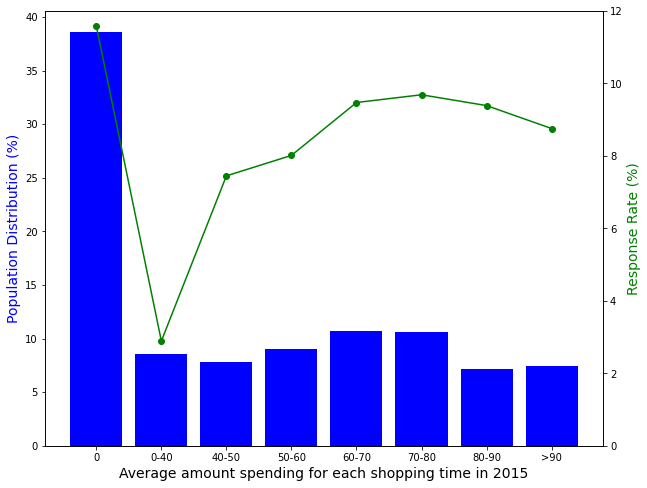

In [38]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(feature1_bins, feature1_population_distribution, color="blue")
ax.set_xlabel("Average amount spending for each shopping time in 2015",fontsize=14)
ax.set_ylabel("Population Distribution (%)",color="blue",fontsize=14)

ax2=ax.twinx()
ax2.plot(feature1_bins, feature1_response_rate,color="green",marker="o")
ax2.set_ylabel("Response Rate (%)",color="green",fontsize=14)
plt.ylim(0, 12)

plt.show()

From this Partial dependency plot, we can see that promotion is more effective against people who has never shopped before, because it has the highest response rate, as well as the percentage of population.

For other groups, the promotion seems to work least efficiently for people spent only a few dollars each time they shopped, while people are more interested in promotion when they spent about 60-90 dollars each time they shopped.

## Feature 2

In [39]:
# Select the second top feature along with the response to form a dataframe.
feature2_df = annual_features_outputs[[feature2, 'response']].sort_values(feature2, ascending = True)

# Explore the statistics of the dataframe.
feature2_df.describe()

,ann_txn_amt_max_2015,response
count,6884.000000,6884.000000
mean,42.905142,0.093986
std,38.614034,0.291831
min,0.000000,0.000000
25%,0.000000,0.000000
50%,47.000000,0.000000
75%,78.000000,0.000000
max,105.000000,1.000000


Text(0.5, 1.0, 'Histogram of ann_txn_amt_max_2015 distribution')

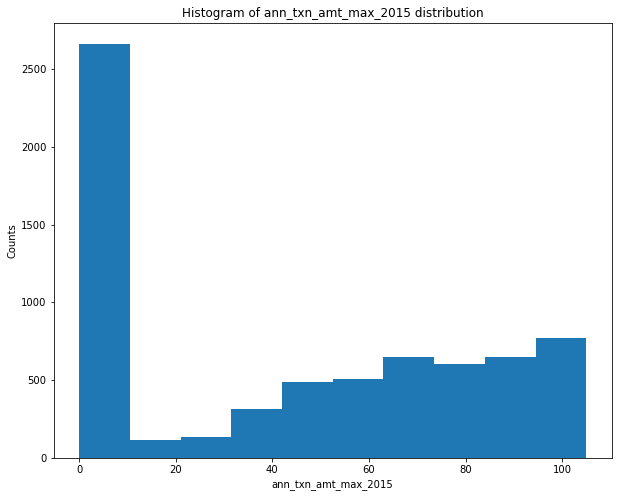

In [40]:
# Plot the histogram to see the distribution of this feature's values.
fig = plt.figure(figsize = (10, 8))
(n, bins, patches) = plt.hist(feature2_df.iloc[:, 0])
plt.xlabel(feature2)
plt.ylabel('Counts')
plt.title('Histogram of ' + feature2 + ' distribution')

In [41]:
bins

array([  0. ,  10.5,  21. ,  31.5,  42. ,  52.5,  63. ,  73.5,  84. ,
        94.5, 105. ])

### Explore the count of each range (personal choice).

In [42]:
feature2_df.loc[feature2_df[feature2] == 0].shape

(2659, 2)

In [43]:
feature2_df.loc[(feature2_df[feature2] > 0) & (feature2_df[feature2] <= 10)].shape

(3, 2)

In [44]:
feature2_df.loc[(feature2_df[feature2] > 10) & (feature2_df[feature2] <= 20)].shape

(113, 2)

In [45]:
feature2_df.loc[(feature2_df[feature2] > 20) & (feature2_df[feature2] <= 30)].shape

(124, 2)

In [46]:
feature2_df.loc[(feature2_df[feature2] > 30) & (feature2_df[feature2] <= 40)].shape

(288, 2)

In [47]:
feature2_df.loc[(feature2_df[feature2] > 40) & (feature2_df[feature2] <= 50)].shape

(435, 2)

In [48]:
feature2_df.loc[(feature2_df[feature2] > 50) & (feature2_df[feature2] <= 60)].shape

(485, 2)

In [49]:
feature2_df.loc[(feature2_df[feature2] > 60) & (feature2_df[feature2] <= 70)].shape

(554, 2)

In [50]:
feature2_df.loc[(feature2_df[feature2] > 70) & (feature2_df[feature2] <= 80)].shape

(635, 2)

In [51]:
feature2_df.loc[(feature2_df[feature2] > 80) & (feature2_df[feature2] <= 90)].shape

(563, 2)

In [52]:
feature2_df.loc[(feature2_df[feature2] > 90) & (feature2_df[feature2] <= 100)].shape

(666, 2)

In [53]:
feature2_df.loc[feature2_df[feature2] > 100].shape

(359, 2)

#### Based on the shape of each range, I decided to use the following ranges:
#### {0, (0, 40], (40, 50], (50, 60], (60, 70], (70, 80], (80, 90], (90, 100], (100, $\infty$)}

In [54]:
feature2_population_distribution_0 = feature2_df.loc[feature2_df[feature2] == 0].shape[0]
feature2_population_distribution_40 = feature2_df.loc[(feature2_df[feature2] > 0) & (feature2_df[feature2] <= 40)].shape[0]
feature2_population_distribution_50 = feature2_df.loc[(feature2_df[feature2] > 40) & (feature2_df[feature2] <= 50)].shape[0]
feature2_population_distribution_60 = feature2_df.loc[(feature2_df[feature2] > 50) & (feature2_df[feature2] <= 60)].shape[0]
feature2_population_distribution_70 = feature2_df.loc[(feature2_df[feature2] > 60) & (feature2_df[feature2] <= 70)].shape[0]
feature2_population_distribution_80 = feature2_df.loc[(feature2_df[feature2] > 70) & (feature2_df[feature2] <= 80)].shape[0]
feature2_population_distribution_90 = feature2_df.loc[(feature2_df[feature2] > 80) & (feature2_df[feature2] <= 90)].shape[0]
feature2_population_distribution_100 = feature2_df.loc[(feature2_df[feature2] > 90) & (feature2_df[feature2] <= 100)].shape[0]
feature2_population_distribution_max = feature2_df.loc[(feature2_df[feature2] > 100)].shape[0]

In [55]:
feature2_population_distribution_sum = feature2_population_distribution_0 + feature2_population_distribution_40 + feature2_population_distribution_50 + feature2_population_distribution_60 + feature2_population_distribution_70 + feature2_population_distribution_80 + feature2_population_distribution_90 + feature2_population_distribution_100 + feature2_population_distribution_max

# Check if sum of observations in each bin equals the original feature df.
feature2_population_distribution_sum == feature2_df.shape[0]

True

### Get the response percentage of each range.

In [56]:
feature2_bin0 = feature2_df.loc[feature2_df[feature2] == 0]
feature2_response_rate_0 = sum(feature2_bin0.response) / len(feature2_bin0.response)
feature2_response_rate_0

0.11583301993230538

In [57]:
feature2_bin40 = feature2_df.loc[(feature2_df[feature2] > 0) & (feature2_df[feature2] <= 40)]
feature2_response_rate_40 = sum(feature2_bin40.response) / len(feature2_bin40.response)
feature2_response_rate_40

0.030303030303030304

In [58]:
feature2_bin50 = feature2_df.loc[(feature2_df[feature2] > 40) & (feature2_df[feature2] <= 50)]
feature2_response_rate_50 = sum(feature2_bin50.response) / len(feature2_bin50.response)
feature2_response_rate_50

0.07126436781609195

In [59]:
feature2_bin60 = feature2_df.loc[(feature2_df[feature2] > 50) & (feature2_df[feature2] <= 60)]
feature2_response_rate_60 = sum(feature2_bin60.response) / len(feature2_bin60.response)
feature2_response_rate_60

0.07835051546391752

In [60]:
feature2_bin70 = feature2_df.loc[(feature2_df[feature2] > 60) & (feature2_df[feature2] <= 70)]
feature2_response_rate_70 = sum(feature2_bin70.response) / len(feature2_bin70.response)
feature2_response_rate_70

0.07942238267148015

In [61]:
feature2_bin80 = feature2_df.loc[(feature2_df[feature2] > 70) & (feature2_df[feature2] <= 80)]
feature2_response_rate_80 = sum(feature2_bin80.response) / len(feature2_bin80.response)
feature2_response_rate_80

0.09133858267716535

In [62]:
feature2_bin90 = feature2_df.loc[(feature2_df[feature2] > 80) & (feature2_df[feature2] <= 90)]
feature2_response_rate_90 = sum(feature2_bin90.response) / len(feature2_bin90.response)
feature2_response_rate_90

0.08703374777975133

In [63]:
feature2_bin100 = feature2_df.loc[(feature2_df[feature2] > 90) & (feature2_df[feature2] <= 100)]
feature2_response_rate_100 = sum(feature2_bin100.response) / len(feature2_bin100.response)
feature2_response_rate_100

0.10510510510510511

In [64]:
feature2_bin_max = feature2_df.loc[feature2_df[feature2] > 100]
feature2_response_rate_max = sum(feature2_bin_max.response) / len(feature2_bin_max.response)
feature2_response_rate_max

0.09192200557103064

In [65]:
feature2_response_rate = [feature2_response_rate_0*100, feature2_response_rate_40*100,
                          feature2_response_rate_50*100, feature2_response_rate_60*100,
                          feature2_response_rate_70*100, feature2_response_rate_80*100,
                          feature2_response_rate_90*100, feature2_response_rate_100*100,
                          feature2_response_rate_max*100]

feature2_population_distribution = [100*feature2_population_distribution_0/feature2_population_distribution_sum,
                                    100*feature2_population_distribution_40/feature2_population_distribution_sum,
                                    100*feature2_population_distribution_50/feature2_population_distribution_sum,
                                    100*feature2_population_distribution_60/feature2_population_distribution_sum,
                                    100*feature2_population_distribution_70/feature2_population_distribution_sum,
                                    100*feature2_population_distribution_80/feature2_population_distribution_sum,
                                    100*feature2_population_distribution_90/feature2_population_distribution_sum,
                                    100*feature2_population_distribution_100/feature2_population_distribution_sum,
                                    100*feature2_population_distribution_max/feature2_population_distribution_sum]

feature2_bins = ['0', '1-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', '>100']

In [66]:
feature2_response_rate

[11.583301993230538,
 3.0303030303030303,
 7.126436781609195,
 7.835051546391752,
 7.9422382671480145,
 9.133858267716535,
 8.703374777975133,
 10.51051051051051,
 9.192200557103064]

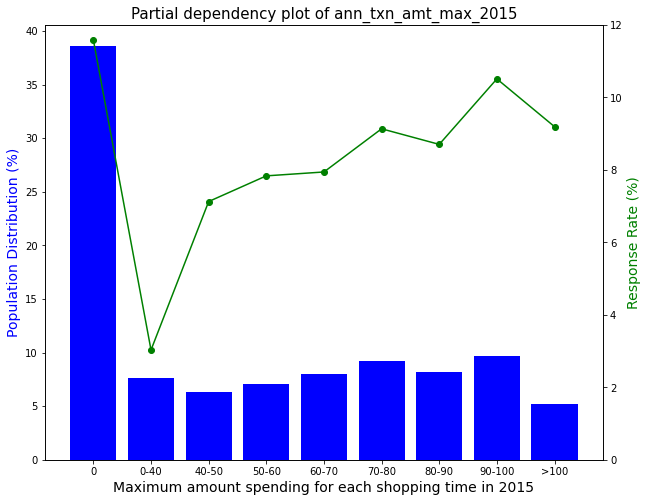

In [67]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(feature2_bins, feature2_population_distribution, color="blue")
ax.set_xlabel("Maximum amount spending for each shopping time in 2015",fontsize=14)
ax.set_ylabel("Population Distribution (%)",color="blue",fontsize=14)

ax2=ax.twinx()
ax2.plot(feature2_bins, feature2_response_rate,color="green",marker="o")
ax2.set_ylabel("Response Rate (%)",color="green",fontsize=14)
plt.ylim(0, 12)

plt.title('Partial dependency plot of ' + feature2, fontsize = 15)
plt.show()

From this Partial dependency plot, we can see that promotion is more effective against people who has never shopped before, because it has the highest response rate, as well as the percentage of population.

For other groups, the promotion seems to work least efficiently for people spent less than 40 dollars each time they shopped, while the more money people spent, the more they are interested in promotion.

## Feature 3

In [68]:
# Select the third top feature along with the response to form a dataframe.
feature3_df = annual_features_outputs[[feature3, 'response']].sort_values(feature3, ascending = True)

# Explore the statistics of the dataframe.
feature3_df.describe()

,ann_txn_amt_sum_2014,response
count,6884.000000,6884.000000
mean,304.257408,0.093986
std,173.032792,0.291831
min,0.000000,0.000000
25%,171.000000,0.000000
50%,286.000000,0.000000
75%,416.000000,0.000000
max,1029.000000,1.000000


Text(0.5, 1.0, 'Histogram of ann_txn_amt_sum_2014 distribution')

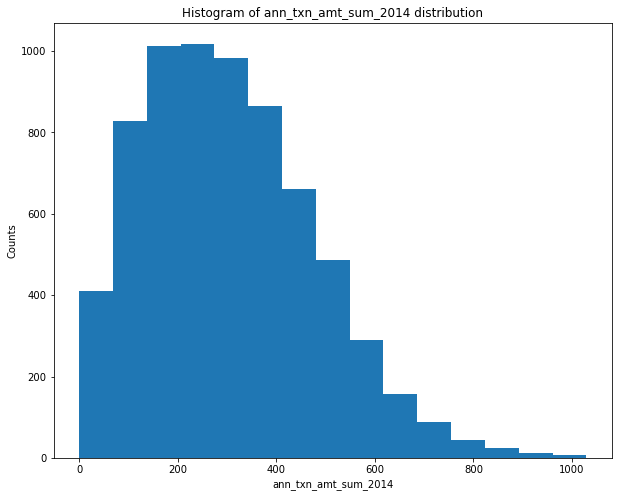

In [69]:
# Plot the histogram to see the distribution of this feature's values.
fig = plt.figure(figsize = (10, 8))
(n, bins, patches) = plt.hist(feature3_df.iloc[:, 0], bins = 15)
plt.xlabel(feature3)
plt.ylabel('Counts')
plt.title('Histogram of ' + feature3 + ' distribution')

### Explore the count of each range.

In [70]:
# Get the coverage of each bin.
bins

array([   0. ,   68.6,  137.2,  205.8,  274.4,  343. ,  411.6,  480.2,
        548.8,  617.4,  686. ,  754.6,  823.2,  891.8,  960.4, 1029. ])

In [71]:
# Get the counts of each bin.
n

array([ 411.,  827., 1012., 1018.,  983.,  866.,  660.,  486.,  289.,
        157.,   89.,   43.,   24.,   13.,    6.])

#### Based on the coverage and count of each range, I decided to use the following ranges:
#### {[0, 70], (70, 140], (140, 210], (210, 280], (280, 350], (350, 420], (420, 490], (490, 560], (560, $\infty$)}

In [72]:
feature3_population_distribution_70 = feature3_df.loc[(feature3_df[feature3] >= 0) & (feature3_df[feature3] <= 70)].shape[0]
feature3_population_distribution_140 = feature3_df.loc[(feature3_df[feature3] > 70) & (feature3_df[feature3] <= 140)].shape[0]
feature3_population_distribution_210 = feature3_df.loc[(feature3_df[feature3] > 140) & (feature3_df[feature3] <= 210)].shape[0]
feature3_population_distribution_280 = feature3_df.loc[(feature3_df[feature3] > 210) & (feature3_df[feature3] <= 280)].shape[0]
feature3_population_distribution_350 = feature3_df.loc[(feature3_df[feature3] > 280) & (feature3_df[feature3] <= 350)].shape[0]
feature3_population_distribution_420 = feature3_df.loc[(feature3_df[feature3] > 350) & (feature3_df[feature3] <= 420)].shape[0]
feature3_population_distribution_490 = feature3_df.loc[(feature3_df[feature3] > 420) & (feature3_df[feature3] <= 490)].shape[0]
feature3_population_distribution_560 = feature3_df.loc[(feature3_df[feature3] > 490) & (feature3_df[feature3] <= 560)].shape[0]
feature3_population_distribution_max = feature3_df.loc[(feature3_df[feature3] > 560)].shape[0]

In [73]:
feature3_population_distribution_sum = feature3_population_distribution_70 + feature3_population_distribution_140 + feature3_population_distribution_210 + feature3_population_distribution_280 + feature3_population_distribution_350 + feature3_population_distribution_420 + feature3_population_distribution_490 + feature3_population_distribution_560 + feature3_population_distribution_max

# Check if sum of observations in each bin equals the original feature df.
feature3_population_distribution_sum == feature3_df.shape[0]

True

### Get the response percentage of each range.

In [74]:
feature3_bin70 = feature3_df.loc[(feature3_df[feature3] > 0) & (feature3_df[feature3] <= 70)]
feature3_response_rate_70 = sum(feature3_bin70.response) / len(feature3_bin70.response)
feature3_response_rate_70

0.011428571428571429

In [75]:
feature3_bin140 = feature3_df.loc[(feature3_df[feature3] > 70) & (feature3_df[feature3] <= 140)]
feature3_response_rate_140 = sum(feature3_bin140.response) / len(feature3_bin140.response)
feature3_response_rate_140

0.017523364485981307

In [76]:
feature3_bin210 = feature3_df.loc[(feature3_df[feature3] > 140) & (feature3_df[feature3] <= 210)]
feature3_response_rate_210 = sum(feature3_bin210.response) / len(feature3_bin210.response)
feature3_response_rate_210

0.030947775628626693

In [77]:
feature3_bin280 = feature3_df.loc[(feature3_df[feature3] > 210) & (feature3_df[feature3] <= 280)]
feature3_response_rate_280 = sum(feature3_bin280.response) / len(feature3_bin280.response)
feature3_response_rate_280

0.047619047619047616

In [78]:
feature3_bin350 = feature3_df.loc[(feature3_df[feature3] > 280) & (feature3_df[feature3] <= 350)]
feature3_response_rate_350 = sum(feature3_bin350.response) / len(feature3_bin350.response)
feature3_response_rate_350

0.1023391812865497

In [79]:
feature3_bin420 = feature3_df.loc[(feature3_df[feature3] > 350) & (feature3_df[feature3] <= 420)]
feature3_response_rate_420 = sum(feature3_bin420.response) / len(feature3_bin420.response)
feature3_response_rate_420

0.1383495145631068

In [80]:
feature3_bin490 = feature3_df.loc[(feature3_df[feature3] > 420) & (feature3_df[feature3] <= 490)]
feature3_response_rate_490 = sum(feature3_bin490.response) / len(feature3_bin490.response)
feature3_response_rate_490

0.15454545454545454

In [81]:
feature3_bin560 = feature3_df.loc[(feature3_df[feature3] > 490) & (feature3_df[feature3] <= 560)]
feature3_response_rate_560 = sum(feature3_bin560.response) / len(feature3_bin560.response)
feature3_response_rate_560

0.208067940552017

In [82]:
feature3_bin_max = feature3_df.loc[feature3_df[feature3] > 560]
feature3_response_rate_max = sum(feature3_bin_max.response) / len(feature3_bin_max.response)
feature3_response_rate_max

0.2323049001814882

In [83]:
feature3_response_rate = [feature3_response_rate_70*100, feature3_response_rate_140*100,
                          feature3_response_rate_210*100, feature3_response_rate_280*100,
                          feature3_response_rate_350*100, feature3_response_rate_420*100,
                          feature3_response_rate_490*100, feature3_response_rate_560*100,
                          feature3_response_rate_max*100]

feature3_population_distribution = [100*feature3_population_distribution_70/feature3_population_distribution_sum,
                                    100*feature3_population_distribution_140/feature3_population_distribution_sum,
                                    100*feature3_population_distribution_210/feature3_population_distribution_sum,
                                    100*feature3_population_distribution_280/feature3_population_distribution_sum,
                                    100*feature3_population_distribution_350/feature3_population_distribution_sum,
                                    100*feature3_population_distribution_420/feature3_population_distribution_sum,
                                    100*feature3_population_distribution_490/feature3_population_distribution_sum,
                                    100*feature3_population_distribution_560/feature3_population_distribution_sum,
                                    100*feature3_population_distribution_max/feature3_population_distribution_sum]

feature3_bins = ['<70', '70-140', '140-210', '210-280', '280-350', '350-420', '420-490', '490-560', '>560']

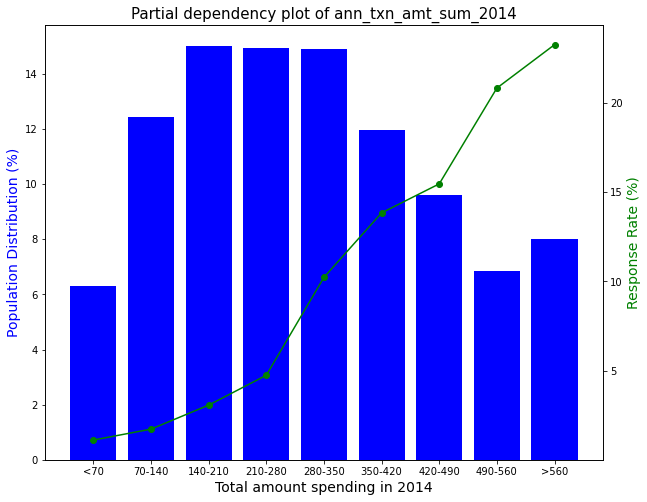

In [84]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(feature3_bins, feature3_population_distribution, color="blue")
ax.set_xlabel("Total amount spending in 2014", fontsize=14)
ax.set_ylabel("Population Distribution (%)",color="blue", fontsize=14)

ax2=ax.twinx()
ax2.plot(feature3_bins, feature3_response_rate,color="green", marker="o")
ax2.set_ylabel("Response Rate (%)",color="green", fontsize=14)

plt.title('Partial dependency plot of ' + feature3, fontsize = 15)
plt.show()

From this Partial dependency plot, we can see very obviously that the trend is increasing. The more money they spent on shopping during the year of 2014, the more responsive they are against promotion.

## Feature 4

In [85]:
# Select the fourth top feature along with the response to form a dataframe.
feature4_df = annual_features_outputs[[feature4, 'response']].sort_values(feature4, ascending = True)

# Explore the statistics of the dataframe.
feature4_df.describe()

,ann_txn_cnt_2015,response
count,6884.000000,6884.000000
mean,0.969059,0.093986
std,1.012375,0.291831
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,0.000000
max,7.000000,1.000000


Text(0.5, 1.0, 'Histogram of ann_txn_cnt_2015 distribution')

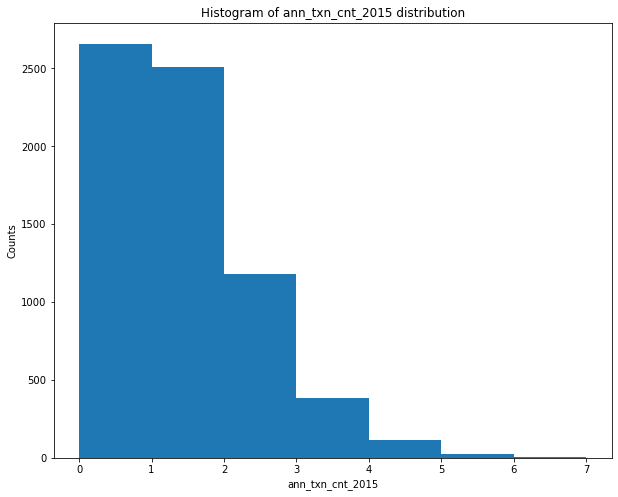

In [86]:
# Plot the histogram to see the distribution of this feature's values.
fig = plt.figure(figsize = (10, 8))
(n, bins, patches) = plt.hist(feature4_df.iloc[:, 0], bins = 7)
plt.xlabel(feature4)
plt.ylabel('Counts')
plt.title('Histogram of ' + feature4 + ' distribution')

### Explore the count of each range.

In [87]:
# Get the coverage of each bin.
bins

array([0., 1., 2., 3., 4., 5., 6., 7.])

In [88]:
# Get the counts of each bin.
n

array([2659., 2509., 1180.,  385.,  117.,   27.,    7.])

#### Based on the coverage and count of each range, I decided to use the following ranges:
#### {[0, 1), [1, 2), [2, 3), [3, 4), [4, 5), [5, 6), [6, 7), [7]}

In [89]:
feature4_population_distribution_0 = feature4_df.loc[feature4_df[feature4] == 0].shape[0]
feature4_population_distribution_1 = feature4_df.loc[feature4_df[feature4] == 1].shape[0]
feature4_population_distribution_2 = feature4_df.loc[feature4_df[feature4] == 2].shape[0]
feature4_population_distribution_3 = feature4_df.loc[feature4_df[feature4] == 3].shape[0]
feature4_population_distribution_4 = feature4_df.loc[feature4_df[feature4] == 4].shape[0]
feature4_population_distribution_5 = feature4_df.loc[feature4_df[feature4] == 5].shape[0]
feature4_population_distribution_6 = feature4_df.loc[feature4_df[feature4] == 6].shape[0]
feature4_population_distribution_7 = feature4_df.loc[feature4_df[feature4] == 7].shape[0]

In [90]:
feature4_population_distribution_sum = feature4_population_distribution_0 + feature4_population_distribution_1 + feature4_population_distribution_2 + feature4_population_distribution_3 + feature4_population_distribution_4 + feature4_population_distribution_5 + feature4_population_distribution_6 + feature4_population_distribution_7

# Check if sum of observations in each bin equals the original feature df.
feature4_population_distribution_sum == feature4_df.shape[0]

True

### Get the response percentage of each range.

In [91]:
feature4_bin0 = feature4_df.loc[feature4_df[feature4] == 0]
feature4_response_rate_0 = sum(feature4_bin0.response) / len(feature4_bin0.response)
feature4_response_rate_0

0.11583301993230538

In [92]:
feature4_bin1 = feature4_df.loc[feature4_df[feature4] == 1]
feature4_response_rate_1 = sum(feature4_bin1.response) / len(feature4_bin1.response)
feature4_response_rate_1

0.07493025109605421

In [93]:
feature4_bin2 = feature4_df.loc[feature4_df[feature4] == 2]
feature4_response_rate_2 = sum(feature4_bin2.response) / len(feature4_bin2.response)
feature4_response_rate_2

0.07796610169491526

In [94]:
feature4_bin3 = feature4_df.loc[feature4_df[feature4] == 3]
feature4_response_rate_3 = sum(feature4_bin3.response) / len(feature4_bin3.response)
feature4_response_rate_3

0.11688311688311688

In [95]:
feature4_bin4 = feature4_df.loc[feature4_df[feature4] >= 4]
feature4_response_rate_4 = sum(feature4_bin4.response) / len(feature4_bin4.response)
feature4_response_rate_4

0.09271523178807947

In [96]:
feature4_response_rate = [feature4_response_rate_0*100, feature4_response_rate_1*100,
                          feature4_response_rate_2*100, feature4_response_rate_3*100,
                          feature4_response_rate_4*100]

feature4_population_distribution = [100*feature4_population_distribution_0/feature4_population_distribution_sum,
                                    100*feature4_population_distribution_1/feature4_population_distribution_sum,
                                    100*feature4_population_distribution_2/feature4_population_distribution_sum,
                                    100*feature4_population_distribution_3/feature4_population_distribution_sum,
                                    100*feature4_population_distribution_4/feature4_population_distribution_sum]

feature4_bins = ['0', '1', '2', '3', '4']

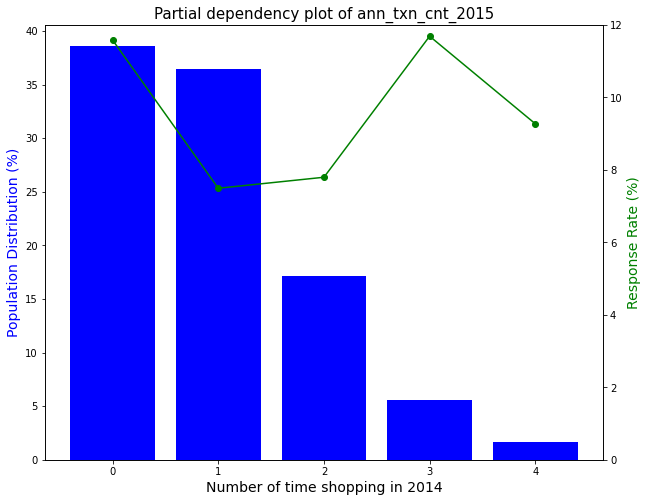

In [97]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(feature4_bins, feature4_population_distribution, color="blue")
ax.set_xlabel("Number of time shopping in 2014", fontsize=14)
ax.set_ylabel("Population Distribution (%)",color="blue", fontsize=14)

ax2=ax.twinx()
ax2.plot(feature4_bins, feature4_response_rate,color="green", marker="o")
ax2.set_ylabel("Response Rate (%)",color="green", fontsize=14)
plt.ylim(0, 12)

plt.title('Partial dependency plot of ' + feature4, fontsize = 15)
plt.show()

From this Partial dependency plot, we can see that promotion is more effective against people who has never shopped before, because it has the second highest response rate (given they have the highest proportion of population, and the response rate is just a little bit less than the group of people shopped 3 times in 2014, we can say that promotion is very effective against people who has never shopped in 2014).

For other groups, the promotion seems to work least efficiently, the response rates fluctuate, so we cannot conclude much (especially with less population proportion).

## Feature 5

In [98]:
# Select the fifth top feature along with the response to form a dataframe.
feature5_df = annual_features_outputs[[feature5, 'response']].sort_values(feature5, ascending = True)

# Explore the statistics of the dataframe.
feature5_df.describe()

,ann_txn_amt_sum_2015,response
count,6884.000000,6884.000000
mean,63.215427,0.093986
std,72.146687,0.291831
min,0.000000,0.000000
25%,0.000000,0.000000
50%,49.000000,0.000000
75%,97.000000,0.000000
max,538.000000,1.000000


Text(0.5, 1.0, 'Histogram of ann_txn_amt_sum_2015 distribution')

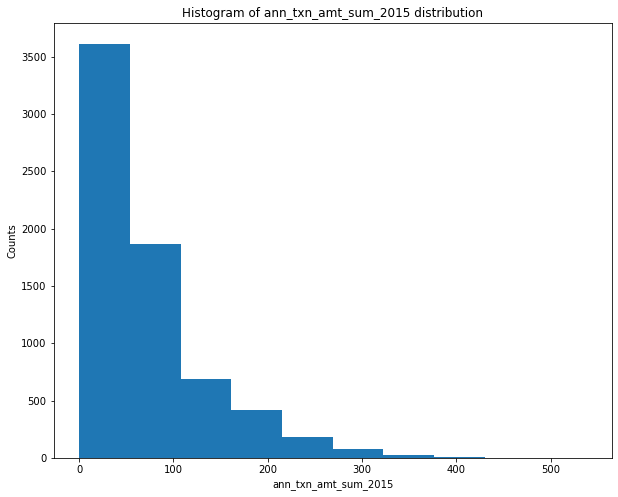

In [99]:
# Plot the histogram to see the distribution of this feature's values.
fig = plt.figure(figsize = (10, 8))
(n, bins, patches) = plt.hist(feature5_df.iloc[:, 0])
plt.xlabel(feature5)
plt.ylabel('Counts')
plt.title('Histogram of ' + feature5 + ' distribution')

### Explore the count of each range.

In [100]:
# Get the coverage of each bin.
bins

array([  0. ,  53.8, 107.6, 161.4, 215.2, 269. , 322.8, 376.6, 430.4,
       484.2, 538. ])

In [101]:
# Get the counts of each bin.
n

array([3.612e+03, 1.869e+03, 6.890e+02, 4.150e+02, 1.800e+02, 8.000e+01,
       2.500e+01, 1.100e+01, 1.000e+00, 2.000e+00])

#### Based on the coverage and count of each range, I decided to use the following ranges:
#### {[0, 50), [50, 100), [100, 150), [150, 200), [200, 250), [250, $\infty$)}

In [119]:
feature5_population_distribution_50 = feature5_df.loc[(feature5_df[feature5] >= 0) & (feature5_df[feature5] <= 50)].shape[0]
feature5_population_distribution_100 = feature5_df.loc[(feature5_df[feature5] > 50) & (feature5_df[feature5] <= 100)].shape[0]
feature5_population_distribution_150 = feature5_df.loc[(feature5_df[feature5] > 100) & (feature5_df[feature5] <= 150)].shape[0]
feature5_population_distribution_200 = feature5_df.loc[(feature5_df[feature5] > 150) & (feature5_df[feature5] <= 200)].shape[0]
feature5_population_distribution_250 = feature5_df.loc[(feature5_df[feature5] > 200) & (feature5_df[feature5] <= 250)].shape[0]
feature5_population_distribution_max = feature5_df.loc[(feature5_df[feature5] > 250)].shape[0]

In [120]:
feature5_population_distribution_sum = feature5_population_distribution_50 + feature5_population_distribution_100 + feature5_population_distribution_150 + feature5_population_distribution_200 + feature5_population_distribution_250 + feature5_population_distribution_max

# Check if sum of observations in each bin equals the original feature df.
feature5_population_distribution_sum == feature5_df.shape[0]

True

### Get the response percentage of each range.

In [104]:
feature5_bin50 = feature5_df.loc[(feature5_df[feature5] >= 0) & (feature5_df[feature5] <= 50)]
feature5_response_rate_50 = sum(feature5_bin50.response) / len(feature5_bin50.response)
feature5_response_rate_50

0.10105623751070511

In [105]:
feature5_bin100 = feature5_df.loc[(feature5_df[feature5] > 50) & (feature5_df[feature5] <= 100)]
feature5_response_rate_100 = sum(feature5_bin100.response) / len(feature5_bin100.response)
feature5_response_rate_100

0.08169014084507042

In [106]:
feature5_bin150 = feature5_df.loc[(feature5_df[feature5] > 100) & (feature5_df[feature5] <= 150)]
feature5_response_rate_150 = sum(feature5_bin150.response) / len(feature5_bin150.response)
feature5_response_rate_150

0.07301173402868318

In [107]:
feature5_bin200 = feature5_df.loc[(feature5_df[feature5] > 150) & (feature5_df[feature5] <= 200)]
feature5_response_rate_200 = sum(feature5_bin200.response) / len(feature5_bin200.response)
feature5_response_rate_200

0.10021321961620469

In [108]:
feature5_bin250 = feature5_df.loc[(feature5_df[feature5] > 200) & (feature5_df[feature5] <= 250)]
feature5_response_rate_250 = sum(feature5_bin250.response) / len(feature5_bin250.response)
feature5_response_rate_250

0.1111111111111111

In [113]:
feature5_bin_max = feature5_df.loc[feature5_df[feature5] > 250]
feature5_response_rate_max = sum(feature5_bin_max.response) / len(feature5_bin_max.response)
feature5_response_rate_max

0.13372093023255813

In [114]:
feature5_response_rate = [feature5_response_rate_50*100, feature5_response_rate_100*100,
                          feature5_response_rate_150*100, feature5_response_rate_200*100,
                          feature5_response_rate_250*100, feature5_response_rate_max*100]

feature5_population_distribution = [100*feature5_population_distribution_50/feature5_population_distribution_sum,
                                    100*feature5_population_distribution_100/feature5_population_distribution_sum,
                                    100*feature5_population_distribution_150/feature5_population_distribution_sum,
                                    100*feature5_population_distribution_200/feature5_population_distribution_sum,
                                    100*feature5_population_distribution_250/feature5_population_distribution_sum,
                                    100*feature5_population_distribution_max/feature5_population_distribution_sum]

feature5_bins = ['0-50', '50-100', '100-150', '150-200', '200-250', '>250']

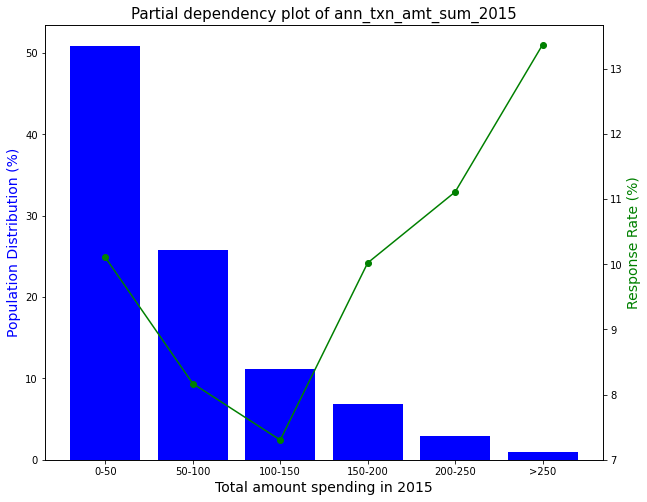

In [115]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(feature5_bins, feature5_population_distribution, color="blue")
ax.set_xlabel("Total amount spending in 2015", fontsize=14)
ax.set_ylabel("Population Distribution (%)",color="blue", fontsize=14)

ax2=ax.twinx()
ax2.plot(feature5_bins, feature5_response_rate,color="green", marker="o")
ax2.set_ylabel("Response Rate (%)",color="green", fontsize=14)

plt.title('Partial dependency plot of ' + feature5, fontsize = 15)
plt.show()

From this Partial dependency plot, we can see that the trend first decreases, then increases. 

For people spent more than 100 dollars in 2015, the more money they spent on shopping during the year of 2015, the more responsive they are against promotion.